In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:


df = pd.read_table('Airfares.txt', delim_whitespace=True,header=None,
                   names=('City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare1','Low price airline','market share1','price'))

In [3]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare1,Low price airline,market share1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [4]:
df.shape

(1000, 11)

In [5]:
df.columns

Index(['City1', 'City2', 'Average Fare', 'Distance',
       'Average weekly passengers', 'market leading airline', 'market share',
       'Average fare1', 'Low price airline', 'market share1', 'price'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of     City1 City2  Average Fare  Distance  Average weekly passengers  \
0     CAK   ATL        114.47       528                     424.56   
1     CAK   MCO        122.47       860                     276.84   
2     ALB   ATL        214.42       852                     215.76   
3     ALB   BWI         69.40       288                     606.84   
4     ALB   ORD        158.13       723                     313.04   
..    ...   ...           ...       ...                        ...   
995   SYR   TPA        136.16      1104                     184.34   
996   TLH   TPA         83.28       200                     232.71   
997   TPA   IAD        159.97       814                     843.80   
998   TPA   PBI         73.57       174                     214.45   
999   IAD   PBI        126.67       859                     475.65   

    market leading airline  market share  Average fare1 Low price airline  \
0                       FL         70.19        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare1                1000 non-null float64
Low price airline            1000 non-null object
market share1                1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [8]:
df.isnull().sum()

City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share                 0
Average fare1                0
Low price airline            0
market share1                0
price                        0
dtype: int64

In [9]:
df.isna().sum()

City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share                 0
Average fare1                0
Low price airline            0
market share1                0
price                        0
dtype: int64

In [10]:
df.dtypes

City1                         object
City2                         object
Average Fare                 float64
Distance                       int64
Average weekly passengers    float64
market leading airline        object
market share                 float64
Average fare1                float64
Low price airline             object
market share1                float64
price                        float64
dtype: object

In [11]:
df['City1'].value_counts()

ATL    64
ORD    63
DFW    52
BWI    47
IAH    38
       ..
TLH     1
IAD     1
SYR     1
ROC     1
PHF     1
Name: City1, Length: 90, dtype: int64

In [12]:
categorical=df.select_dtypes(include=['object'])
categorical.columns

Index(['City1', 'City2', 'market leading airline', 'Low price airline'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
le=LabelEncoder()
df_cat=categorical.apply(le.fit_transform)
df_cat.head()

,City1,City2,market leading airline,Low price airline
0,16,0,6,8
1,16,40,6,6
2,2,0,4,5
3,2,7,14,17
4,2,52,12,17


In [15]:
df=df.drop(categorical.columns,axis=1)

In [16]:
df=pd.concat([df,df_cat],axis=1)

In [17]:
df.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare1,market share1,price,City1,City2,market leading airline,Low price airline
0,114.47,528,424.56,70.19,111.03,70.19,111.03,16,0,6,8
1,122.47,860,276.84,75.10,123.09,17.23,118.94,16,40,6,6
2,214.42,852,215.76,78.89,223.98,2.77,167.12,2,0,4,5
3,69.40,288,606.84,96.97,68.86,96.97,68.86,2,7,14,17
4,158.13,723,313.04,39.79,161.36,15.34,145.42,2,52,12,17


In [18]:
df.dtypes

Average Fare                 float64
Distance                       int64
Average weekly passengers    float64
market share                 float64
Average fare1                float64
market share1                float64
price                        float64
City1                          int32
City2                          int32
market leading airline         int32
Low price airline              int32
dtype: object

In [19]:
scale_df = df.drop(['Average Fare','City1','City2','market leading airline','Low price airline'],axis=1)
scale_df.head()

,Distance,Average weekly passengers,market share,Average fare1,market share1,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12
3,288,606.84,96.97,68.86,96.97,68.86
4,723,313.04,39.79,161.36,15.34,145.42


In [20]:
from scipy.stats import zscore

In [21]:
scale_df=scale_df.apply(zscore)
scale_df.head()

,Distance,Average weekly passengers,market share,Average fare1,market share1,price
0,-0.822816,-0.323336,0.519752,-0.888051,1.315878,-0.681341
1,-0.306391,-0.516148,0.773393,-0.695488,-0.639560,-0.513776
2,-0.318835,-0.595872,0.969177,0.915432,-1.173465,0.506866
3,-1.196135,-0.085415,1.903153,-1.561383,2.304674,-1.574668
4,-0.519494,-0.468897,-1.050651,-0.084427,-0.709344,0.047175


In [22]:
df=df.drop(['Distance', 'Average weekly passengers', 'market share',
       'Average fare1', 'market share1', 'price'],axis=1)

In [23]:
df=pd.concat([df,scale_df],axis=1)
df.head()

,Average Fare,City1,City2,market leading airline,Low price airline,Distance,Average weekly passengers,market share,Average fare1,market share1,price
0,114.47,16,0,6,8,-0.822816,-0.323336,0.519752,-0.888051,1.315878,-0.681341
1,122.47,16,40,6,6,-0.306391,-0.516148,0.773393,-0.695488,-0.639560,-0.513776
2,214.42,2,0,4,5,-0.318835,-0.595872,0.969177,0.915432,-1.173465,0.506866
3,69.40,2,7,14,17,-1.196135,-0.085415,1.903153,-1.561383,2.304674,-1.574668
4,158.13,2,52,12,17,-0.519494,-0.468897,-1.050651,-0.084427,-0.709344,0.047175


In [24]:
df.shape

(1000, 11)

In [25]:
x=df.drop("Average Fare",axis=1)
y=df["Average Fare"]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [27]:
import statsmodels.api as sm
X=sm.add_constant(x_train)
lm = sm.OLS(y_train, X).fit()

C:\Users\RAMASAMY\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2636.
Date:                Sat, 07 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:11:19   Log-Likelihood:                -2513.4
No. Observations:                 700   AIC:                             5049.
Df Residuals:                     689   BIC:                             5099.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# CHECKING FOR LINEAR ASSUMPTIONS



# 1.NO AUTO CORRELATION

DURBIN-WATSON : 2.005 (closer to 2 , no auto correlation)
    
  NO AUTO CORRELAION
    
[


DB=2 , NO AUTO CORRELATION
DB<2 : CLOSER TO 0 , POSITIVE AUTO CORRELATION
DB>2 : CLOSER TO 4 , NEGATIVE AUTO CORRELATION

The test statistic is equal to 2*(1-r) where r is the sample autocorrelation of the residuals.

Thus for r==0 indicating no serial correlation, the test statistic equals 2.

Closer to 0, more evidence for positive serial correlation and closer to 4 indicates negative serial correlation.

]

# 2.NO MULTICOLLINEARITY

-> OLS MODEL DOES NOT THROW [ WARNING : PRESENCE OF MULTICOLLINEARITY ]

    SO NO MULTI COLLINEARITY

-> CHECKING MULTICOLLINEARITY WITH HEAT MAP

-> VIF

# HEAT MAP-CORRELATION

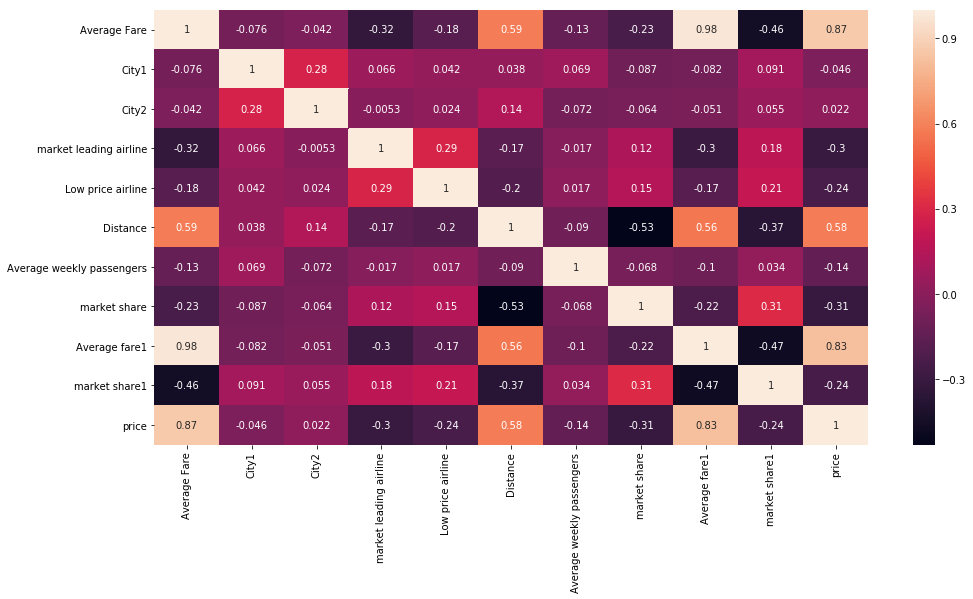

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# VIF

In [30]:
#VIF - Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values, col) 
                   for col in range(0, x.shape[1])]

In [31]:
ce = ['City1', 'City2', 'market leading airline', 'Low price airline',
       'Distance', 'Average weekly passengers', 'market share', 'Average fare1',
       'market share1', 'price']

In [32]:
vif["Feature Names"] = ce

In [33]:
vif

,VIF Values,Feature Names
0,3.487933,City1
1,4.611549,City2
2,3.380312,market leading airline
3,3.771705,Low price airline
4,2.099403,Distance
5,1.057375,Average weekly passengers
6,1.582555,market share
7,4.754609,Average fare1
8,1.644946,market share1
9,4.244785,price


# 3.NO HETEROSKEDASTICITY

->BREUSH-PAGON TEST

->GOLDFIELD QUANDT TEST


Null Hypothesis - The Data is HOMOSCEDASTIC (Uniform Variance)

Alternate Hypothesis - Data is HETEROSCEDASTIC( Unequal Variance)

# GOLDFELD QUANDT TEST



In [34]:
from statsmodels.stats.api import linear_rainbow, het_goldfeldquandt,het_breuschpagan
het_goldfeldquandt(y, x)

(0.5107305176379157, 0.9999999999999113, 'increasing')

[f value , p value, increasing]

p value=0.999 not lesser than 0.05 = >failed to reject null hypothesis

accept null hypothesis : homoscedasticity

alternate hypothesis is false

(no heteroskedasticity)

# BREUSH PAGAN TEST

In [35]:
_,pval,_,f_pval=het_breuschpagan(y,x)

In [36]:
print(pval,f_pval)

2.5498869033297465e-194 0.0


pvalue=2.54 e^-194 lesser than 0.05 => reject null hypothesis

so alternate hypothesis : true
    
(heteroscedasticity)

# NORMALITY

Null Hypothesis - The Data is following the Gaussian pattern

Alternate Hypothesis - Data is not following the Gaussian Pattern

# SHAPIRO-WILK TEST

In [37]:
from scipy.stats import shapiro
shapiro(lm.resid)
#shapiro(x)

(0.93499755859375, 6.778334176543745e-17)

[fvalue,pvalue] 

pvalue : lesser than 0.05 : reject null hypothesis

alternate hypothesis : true
    
so data is not normal


In [38]:
#from scipy.stats import anderson,kstest
#anderson(x,dist='norm')
#kstest(  )

# QQ PLOT (QUANTILE QUANTILE PLOT)

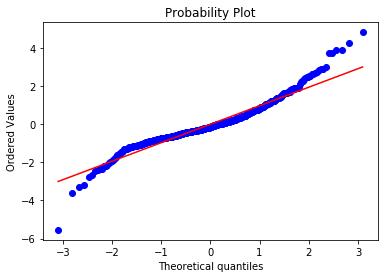

In [39]:
# QQ Plot - Showing that the residuals are not normal
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

# Finding the Values
fittedvalues = lm.fittedvalues
residuals = lm.resid
st_residual = lm.get_influence().resid_studentized_internal

stats.probplot(st_residual, dist="norm", plot=pylab)
plt.show()

# LINEARITY 

1. RAINBOW TEST

2. RESIDUAL PLOT

# RAINBOW TEST

Null Hypothesis - The Data is following the linear pattern

Alternate Hypothesis - Data is not following the Linear Pattern

In [40]:
linear_rainbow(lm)

(1.013685343783798, 0.4500807772584523)

[fvalue , pvalue]

pvalue=0.2 > 0.05 : failed to reject null hypothesis
    
accept null hypothesis

alternate hypothesis : false

(linearity)

# RESIDUAL PLOT 

-> IF RESIDUALS ARE SCATTERED , LINEAR

-> IF RESIDUALS FOLLOW A PATTERN , NOT LINEAR

In [41]:
fittedvalues = lm.fittedvalues
residuals = lm.resid
st_residual = lm.get_influence().resid_studentized_internal

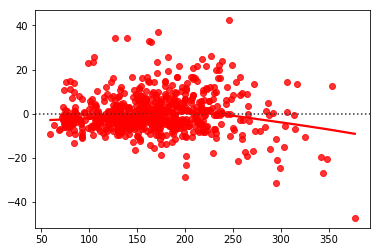

In [42]:
# Residual Plot
import seaborn as sns
sns.residplot(fittedvalues, residuals, color="r", lowess=True)

LINEARITY SHOWN



SO AMONG ALL ASSUMPTIONS , ATLEAST 3 ASSUMPTIONS ARE SATISFIED

NO AUTO CORRELATION - PROVED
NO MULTI COLLINEARITY - PROVED
NO HETEROSCEDASTICITY - DOUBT
NORMALITY - FAILED
LINEARITY - PROVED

# SIMPLE LINEAR REGRESSION MODEL

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm1=LinearRegression()

In [45]:
lm1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred=lm1.predict(x_test)

In [47]:
y_pred_train =lm1.predict(x_train)

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [49]:
print("r2_score_train::",r2_score(y_true=y_train, y_pred=y_pred_train))
print("r2_score_test::",r2_score(y_true=y_test, y_pred=y_pred))
print("mae::",mean_absolute_error(y_test,y_pred))
print("mse::",mean_squared_error(y_test,y_pred))
print("rmse::",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score_train:: 0.9745319766665045
r2_score_test:: 0.9761289822556631
mae:: 6.189957678429106
mse:: 75.17413523893345
rmse:: 8.670301911636841


# OLS MODEL FOR ENTIRE DATASET

In [50]:
X=sm.add_constant(x)
new_model = sm.OLS(y,X).fit() # Fitting the Model on the Data
new_pred = new_model.predict(X)

C:\Users\RAMASAMY\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [51]:
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     3882.
Date:                Sat, 07 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:11:26   Log-Likelihood:                -3584.8
No. Observations:                1000   AIC:                             7192.
Df Residuals:                     989   BIC:                             7246.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# OLS MODEL WITH POLYNOMIAL FEATURES

ONLY WHEN THERE IS NO LINEARITY , WE TRANSFORM DATA INTO POLYNOMIAL SO IT CAN ACHIEVE LINEARITY IN MULTI DIMENSIONAL SPACE

THE MODEL MAY SHOW HIGH R2 SCORE, BUT AT THE SAME TIME , IT ALSO SHOWS MULTI COLLINEARITY WHICH WAS NOT PRESENT BEFORE. PROBABLY DUE TO OVERFITTING

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
pf=PolynomialFeatures()

In [54]:
X = pf.fit_transform(x)

In [55]:
# Building the Model
pf_model = sm.OLS(y,X).fit() # Fitting the Model on the Data
pf_pred = pf_model.predict(X) # Making Prediction on X values 
st_residual = pf_model.get_influence().resid_studentized_internal

In [56]:
print(pf_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Average Fare   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1288.
Date:                Sat, 07 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:11:27   Log-Likelihood:                -3178.8
No. Observations:                1000   AIC:                             6490.
Df Residuals:                     934   BIC:                             6814.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        161.3466      1.782     90.562      0.0

In [57]:
print("r2_score_test::",r2_score(y_true=y, y_pred=pf_pred))
print("mae::",mean_absolute_error(y,pf_pred))
print("mse::",mean_squared_error(y,pf_pred))
print("rmse::",np.sqrt(mean_squared_error(y,pf_pred)))

r2_score_test:: 0.9889705802104025
mae:: 3.839983233701458
mse:: 33.77506092685079
rmse:: 5.811631520223111


# ENSEMBLE MODELS : RANDOM FOREST REGRESSOR AND BAGGING REGRESSOR

In [ ]:

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [59]:

rf = RandomForestRegressor()
bag = BaggingRegressor()

In [60]:
# Random Forest
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)


C:\Users\RAMASAMY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [65]:
print("r2_score_test::",r2_score(pred_rf,y_test))
print("mae::",mean_absolute_error(y_test,pred_rf))
print("mse::",mean_squared_error(y_test,pred_rf))
print("rmse::",np.sqrt(mean_squared_error(y_test,pred_rf)))

r2_score_test:: 0.9726946251906029
mae:: 5.4525000000000015
mse:: 82.30592374666669
rmse:: 9.07226122566291


In [62]:
# Bagging
bag.fit(x_train,y_train)
pred_bag = bag.predict(x_test)


In [63]:
print("r2_score_test::",r2_score(y_true=y_test, y_pred=pred_bag))
print("mae::",mean_absolute_error(y_test,pred_bag))
print("mse::",mean_squared_error(y_test,pred_bag))
print("rmse::",np.sqrt(mean_squared_error(y_test,pred_bag)))

r2_score_test:: 0.975249938385213
mae:: 5.4980400000000005
mse:: 77.9424027466667
rmse:: 8.828499461780961
